# 1) Data Collecting: Scraping IMDB for collecting comments

# 2) Data Manipulatiing: Data cleaning 

# 3) Visualization

# 4) Natural Language Processing: Topic Modeling, N-gram, Sentiment Analysis

In [1]:
#importing the libraries

from urllib.request import urlopen
from bs4 import BeautifulSoup
import lxml
from urllib.error import HTTPError
from urllib.error import URLError
import re
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

# 1) Data collecting

In [2]:
# address for users reviews for The Witcher in IMDB
url = "https://www.imdb.com/title/tt5180504/reviews?ref_=tt_urv"
url1 = "https://www.imdb.com/title/tt5180504/reviews?sort=submissionDate&dir=desc&ratingFilter=0"
url2 = "https://www.imdb.com/title/tt5180504/reviews?sort=totalVotes&dir=desc&ratingFilter=0"
url3 = "https://www.imdb.com/title/tt5180504/reviews?sort=reviewVolume&dir=desc&ratingFilter=0"
url4 = "https://www.imdb.com/title/tt5180504/reviews?sort=userRating&dir=desc&ratingFilter=0"


In [3]:
soup = BeautifulSoup(urlopen(url))

In [4]:
# opening the connection and collecting the html page

try:
    client = urlopen(url)
except HTTPError as e:
    print("The server returned an HTTP error")
except URLError as e:
    print("The server could not be found!")
else:
    print(client.read(100))



b'\n \n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.'


In [5]:
soup = BeautifulSoup(client, "html.parser")

In [6]:
# checking page structure
#soup.find_all("div" , {"class" : "review-container"})

In [7]:
# Extract the review
movie_containers = soup.find_all("div" , {"class" : "review-container"})
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
25


In [8]:
# Lists to store the scraped data in
reviews = []
ratings = []

# Extract data from individual movie container
for container in movie_containers:
    
    #review
    review = container.a.text
    reviews.append(review)
    
    #rating
    rating = container.span.text
    ratings.append(rating)


# 2) Data Manipulation

In [9]:
#Making the data frame using Pandas
test_df = pd.DataFrame({'Review': reviews,'Rating': ratings})
print(test_df.info())
test_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Review    25 non-null object
Rating    25 non-null object
dtypes: object(2)
memory usage: 528.0+ bytes
None


,Review,Rating
0,Enjoyable but....\n,\n\n\n\n\n\n7/10\n
1,Henry Cavill carried the whole show\n,\n\n\n\n\n\n8/10\n
2,"Terrible writing, bad pacing, confusing timel...",\n\n\n\n\n\n5/10\n
3,"The Witcher: Blood, Dark, Magic, etc.\n",\n\n\n\n\n\n9/10\n
4,Why is this so highly rated?\n,\n\n\n\n\n\n5/10\n
5,Huge potential wasted (mostly) by terrible sc...,\n\n\n\n\n\n7/10\n
6,Just bad fan fiction only improved by Henry C...,\n\n\n\n\n\n4/10\n
7,Hard to follow\n,\n\n\n\n\n\n5/10\n
8,Is everybody watching the same thing I'm watc...,\n\n\n\n\n\n4/10\n
9,Not that good\n,\n\n\n\n\n\n5/10\n


In [10]:
# Cleaning the ratings
test_df.loc[:, 'Rating'] = test_df['Rating'].str[6:8]

In [11]:
test_df.head()

,Review,Rating
0,Enjoyable but....\n,7/
1,Henry Cavill carried the whole show\n,8/
2,"Terrible writing, bad pacing, confusing timel...",5/
3,"The Witcher: Blood, Dark, Magic, etc.\n",9/
4,Why is this so highly rated?\n,5/


In [12]:
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('/', '')
test_df.loc[:, 'Review'] = test_df['Review'].str.replace('\n', '')
test_df.loc[:, 'Rating'] = test_df['Rating'].str.replace('-', '')

In [13]:
test_df.head()

,Review,Rating
0,Enjoyable but....,7
1,Henry Cavill carried the whole show,8
2,"Terrible writing, bad pacing, confusing timel...",5
3,"The Witcher: Blood, Dark, Magic, etc.",9
4,Why is this so highly rated?,5


In [14]:
def split_it(rating):
    return re.sub('[a-zA-Z]+','NaN', rating)

In [15]:
test_df['Rating'] = test_df['Rating'].apply(split_it)

In [16]:
test_df = test_df[test_df.Rating.str.contains("NaN") == False]


In [17]:
test_df['Rating'] = test_df['Rating'].apply(pd.to_numeric)


In [18]:
test_df.head()

,Review,Rating
0,Enjoyable but....,7
1,Henry Cavill carried the whole show,8
2,"Terrible writing, bad pacing, confusing timel...",5
3,"The Witcher: Blood, Dark, Magic, etc.",9
4,Why is this so highly rated?,5



# 3) Visualization

In [19]:
#Shape of Ratings
print('Data Set Shape = {}'.format(test_df.shape))

Data Set Shape = (25, 2)


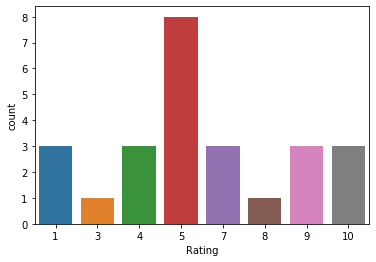

In [20]:
# rating distribution
sns.countplot(test_df['Rating'])

In [23]:
# description
test_df.describe()

,Rating
count,25.000000
mean,5.760000
std,2.773085
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,10.000000


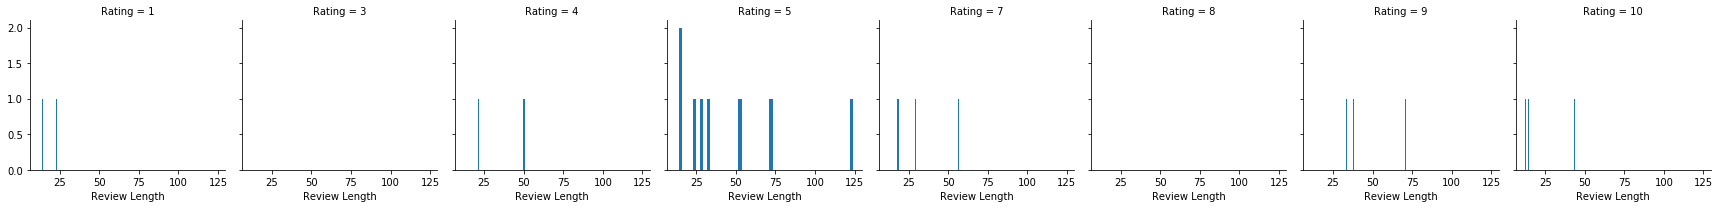

In [24]:
# relationship between review lenght and rating
test_df['Review']=test_df['Review'].astype(str)
test_df['Review Length']=test_df['Review'].apply(len)

g = sns.FacetGrid(data=test_df, col='Rating')
g.map(plt.hist, 'Review Length', bins=50)

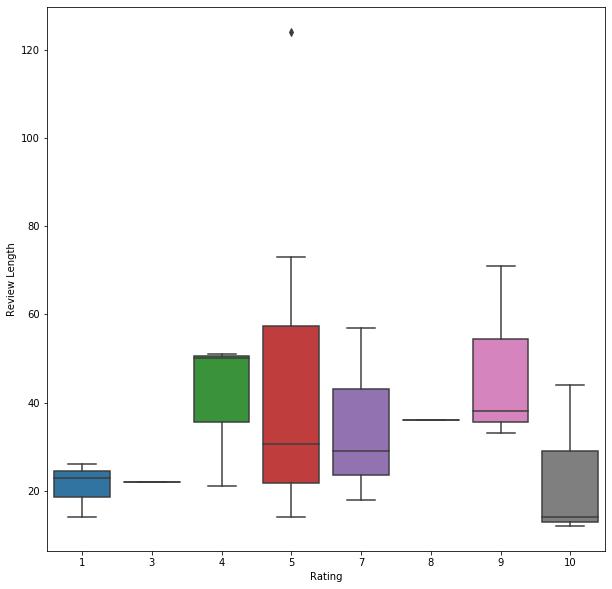

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Rating', y='Review Length', data=test_df)

# 4) Natural Language Processing

In [67]:
a = test_df['Review'].str.lower().str.cat(sep=' ')

In [68]:
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [72]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [73]:
word_tokens = word_tokenize(b)


In [74]:
len(word_tokens)


151

In [75]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [76]:
len(filtered_sentence)


91

In [82]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]  

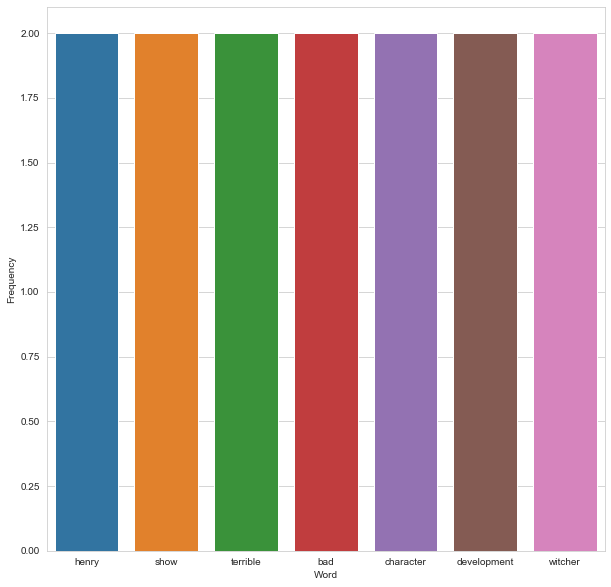

In [90]:
#Let us look at the top 10 most used words in a review.
top_N = 10
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [84]:
from wordcloud import WordCloud, STOPWORDS

In [85]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

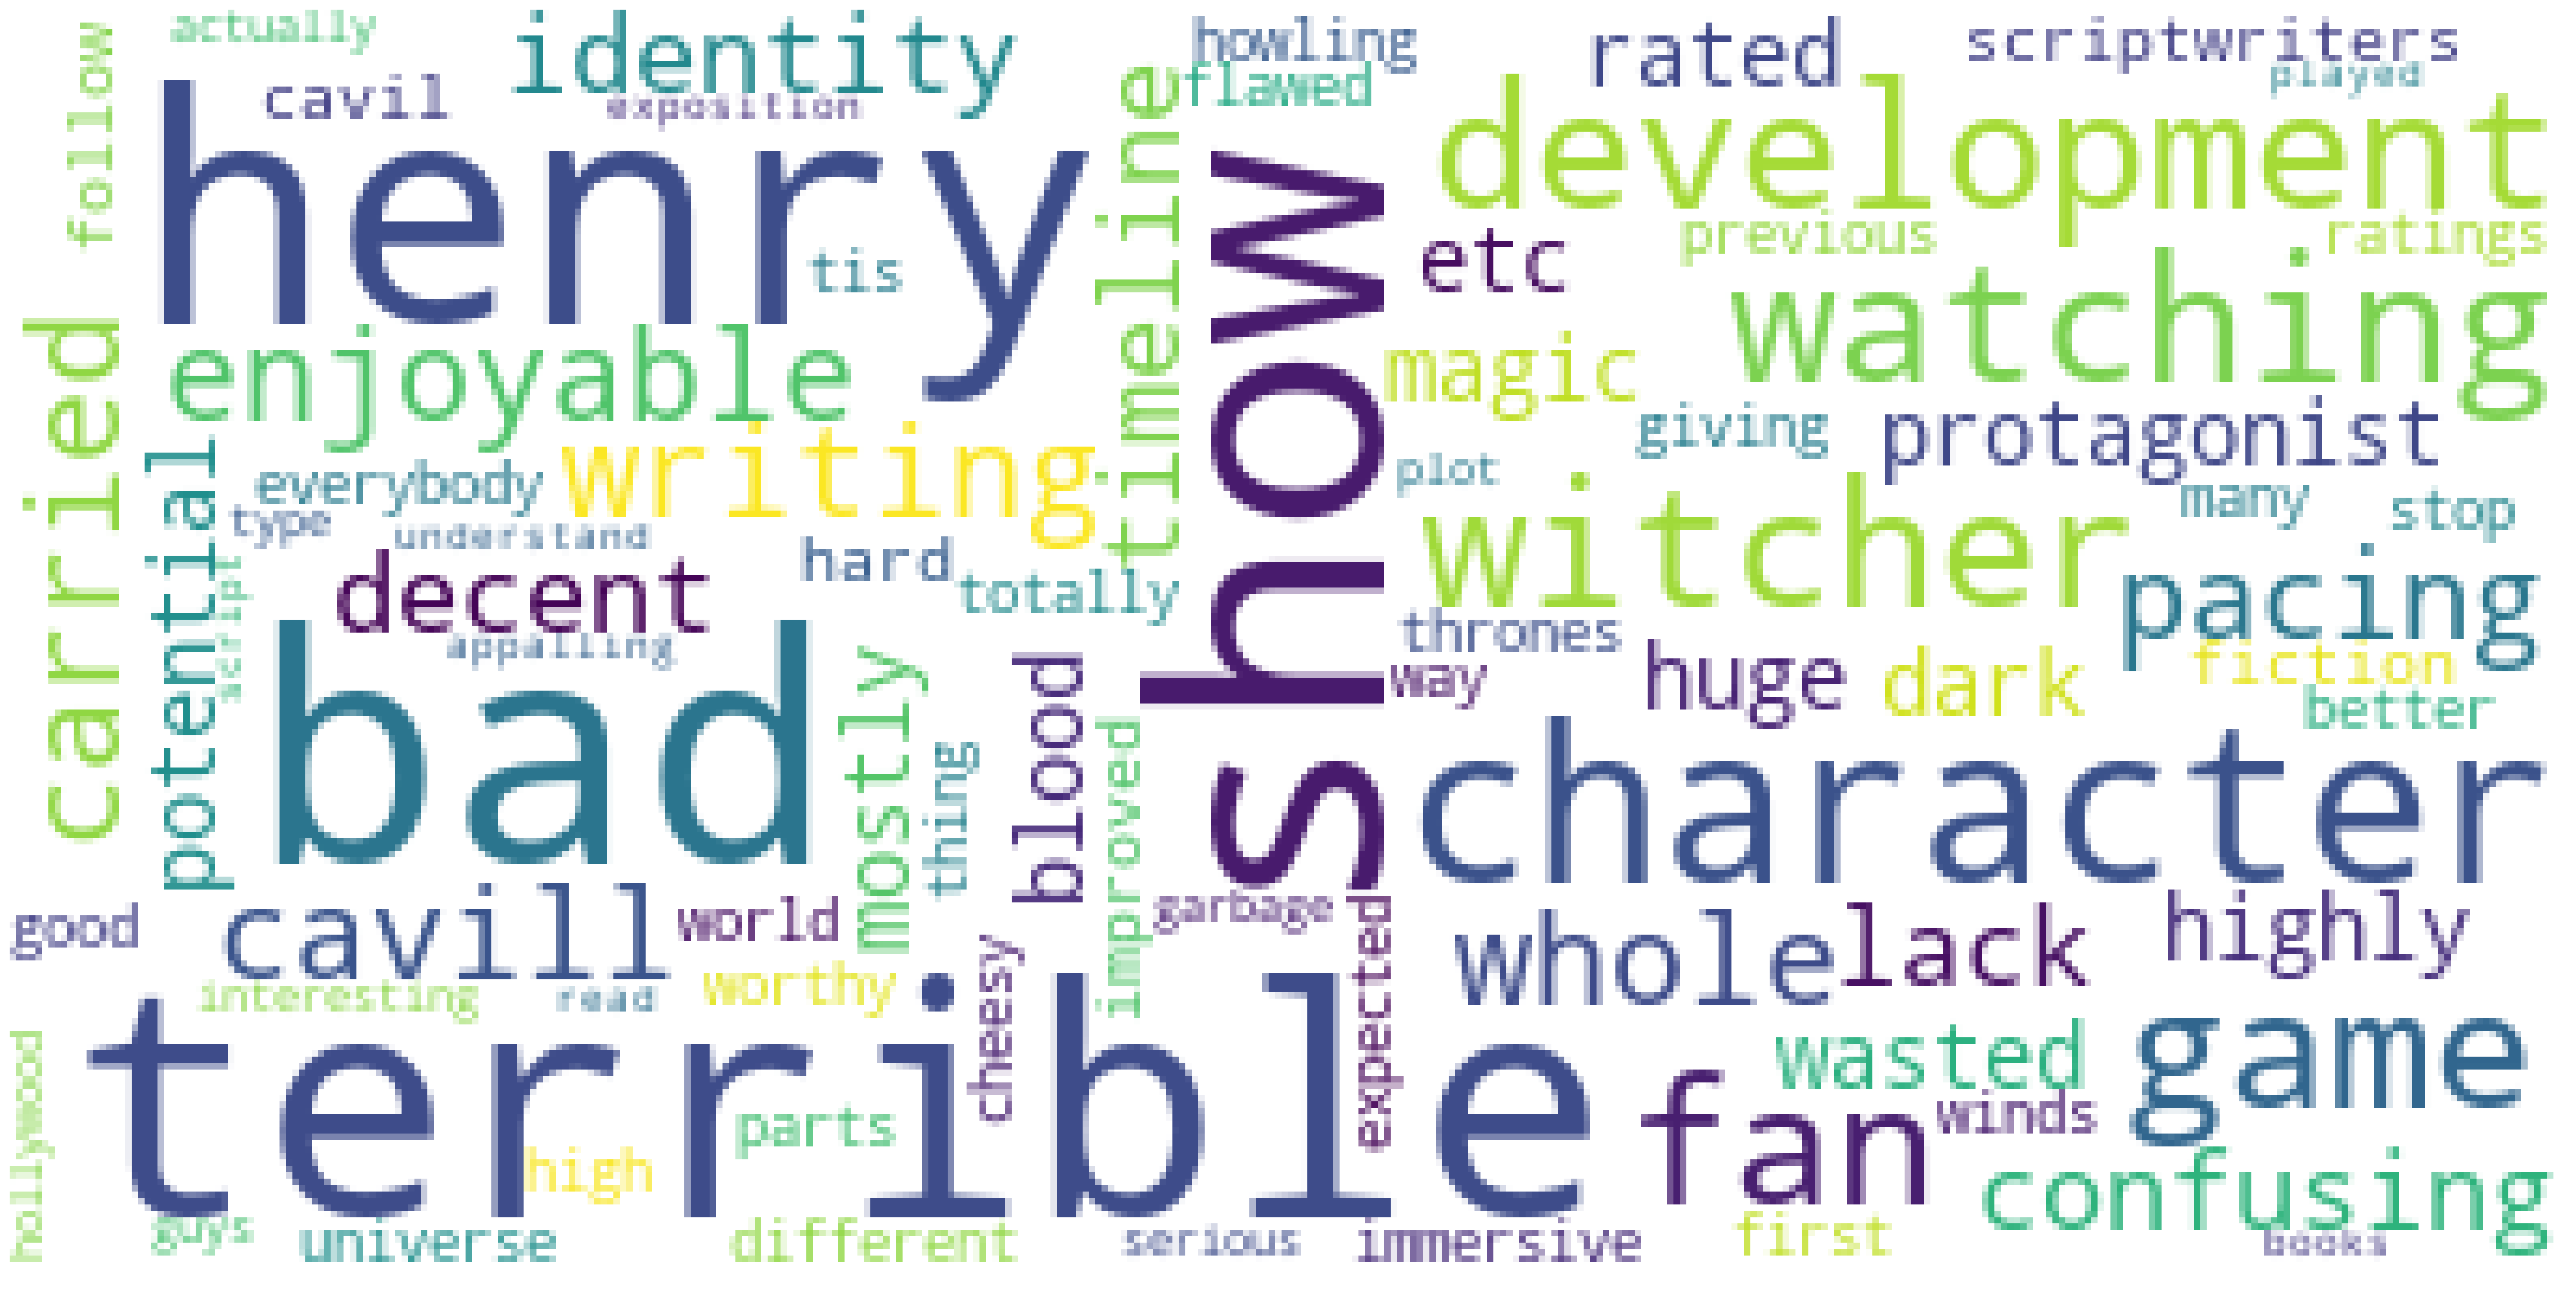

In [86]:
# the most frequent words
wc(cleaned_data_title,'white','Most Used Words')

In [91]:
#Sentiment Analysis
from textblob import TextBlob

bloblist_desc = list()

df_review_str=test_df['Review'].astype(str)

In [92]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [93]:
#Polarity Matrix We try to perform sentimental analysis and try to classify whether a review is a positive or negative
df_polarity_desc.head()

,Review,sentiment,polarity
0,Enjoyable but....,0.500000,0.600000
1,Henry Cavill carried the whole show,0.200000,0.400000
2,"Terrible writing, bad pacing, confusing timel...",-0.458333,0.683333
3,"The Witcher: Blood, Dark, Magic, etc.",0.175000,0.700000
4,Why is this so highly rated?,0.160000,0.540000


In [94]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] >= 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] >= -0.09:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

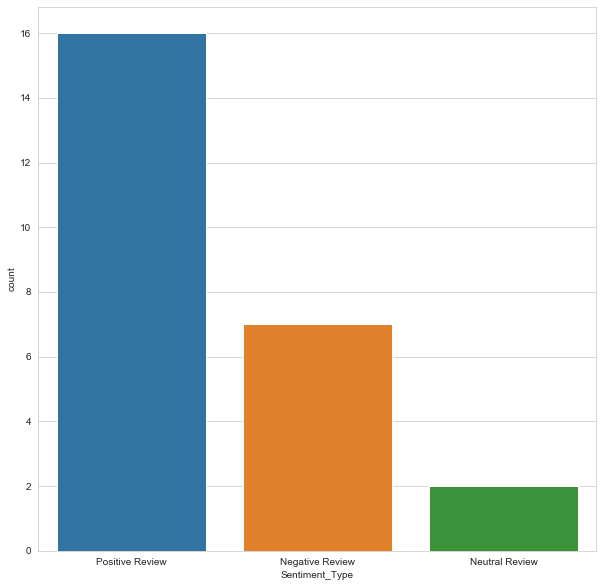

In [95]:

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [96]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [97]:
negative_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
2,"Terrible writing, bad pacing, confusing timel...",-0.458333,0.683333,Negative Review
5,Huge potential wasted (mostly) by terrible sc...,-0.200000,0.725000,Negative Review
6,Just bad fan fiction only improved by Henry C...,-0.350000,0.833333,Negative Review
7,Hard to follow,-0.291667,0.541667,Negative Review
12,A flawed but immersive world,-0.500000,0.500000,Negative Review


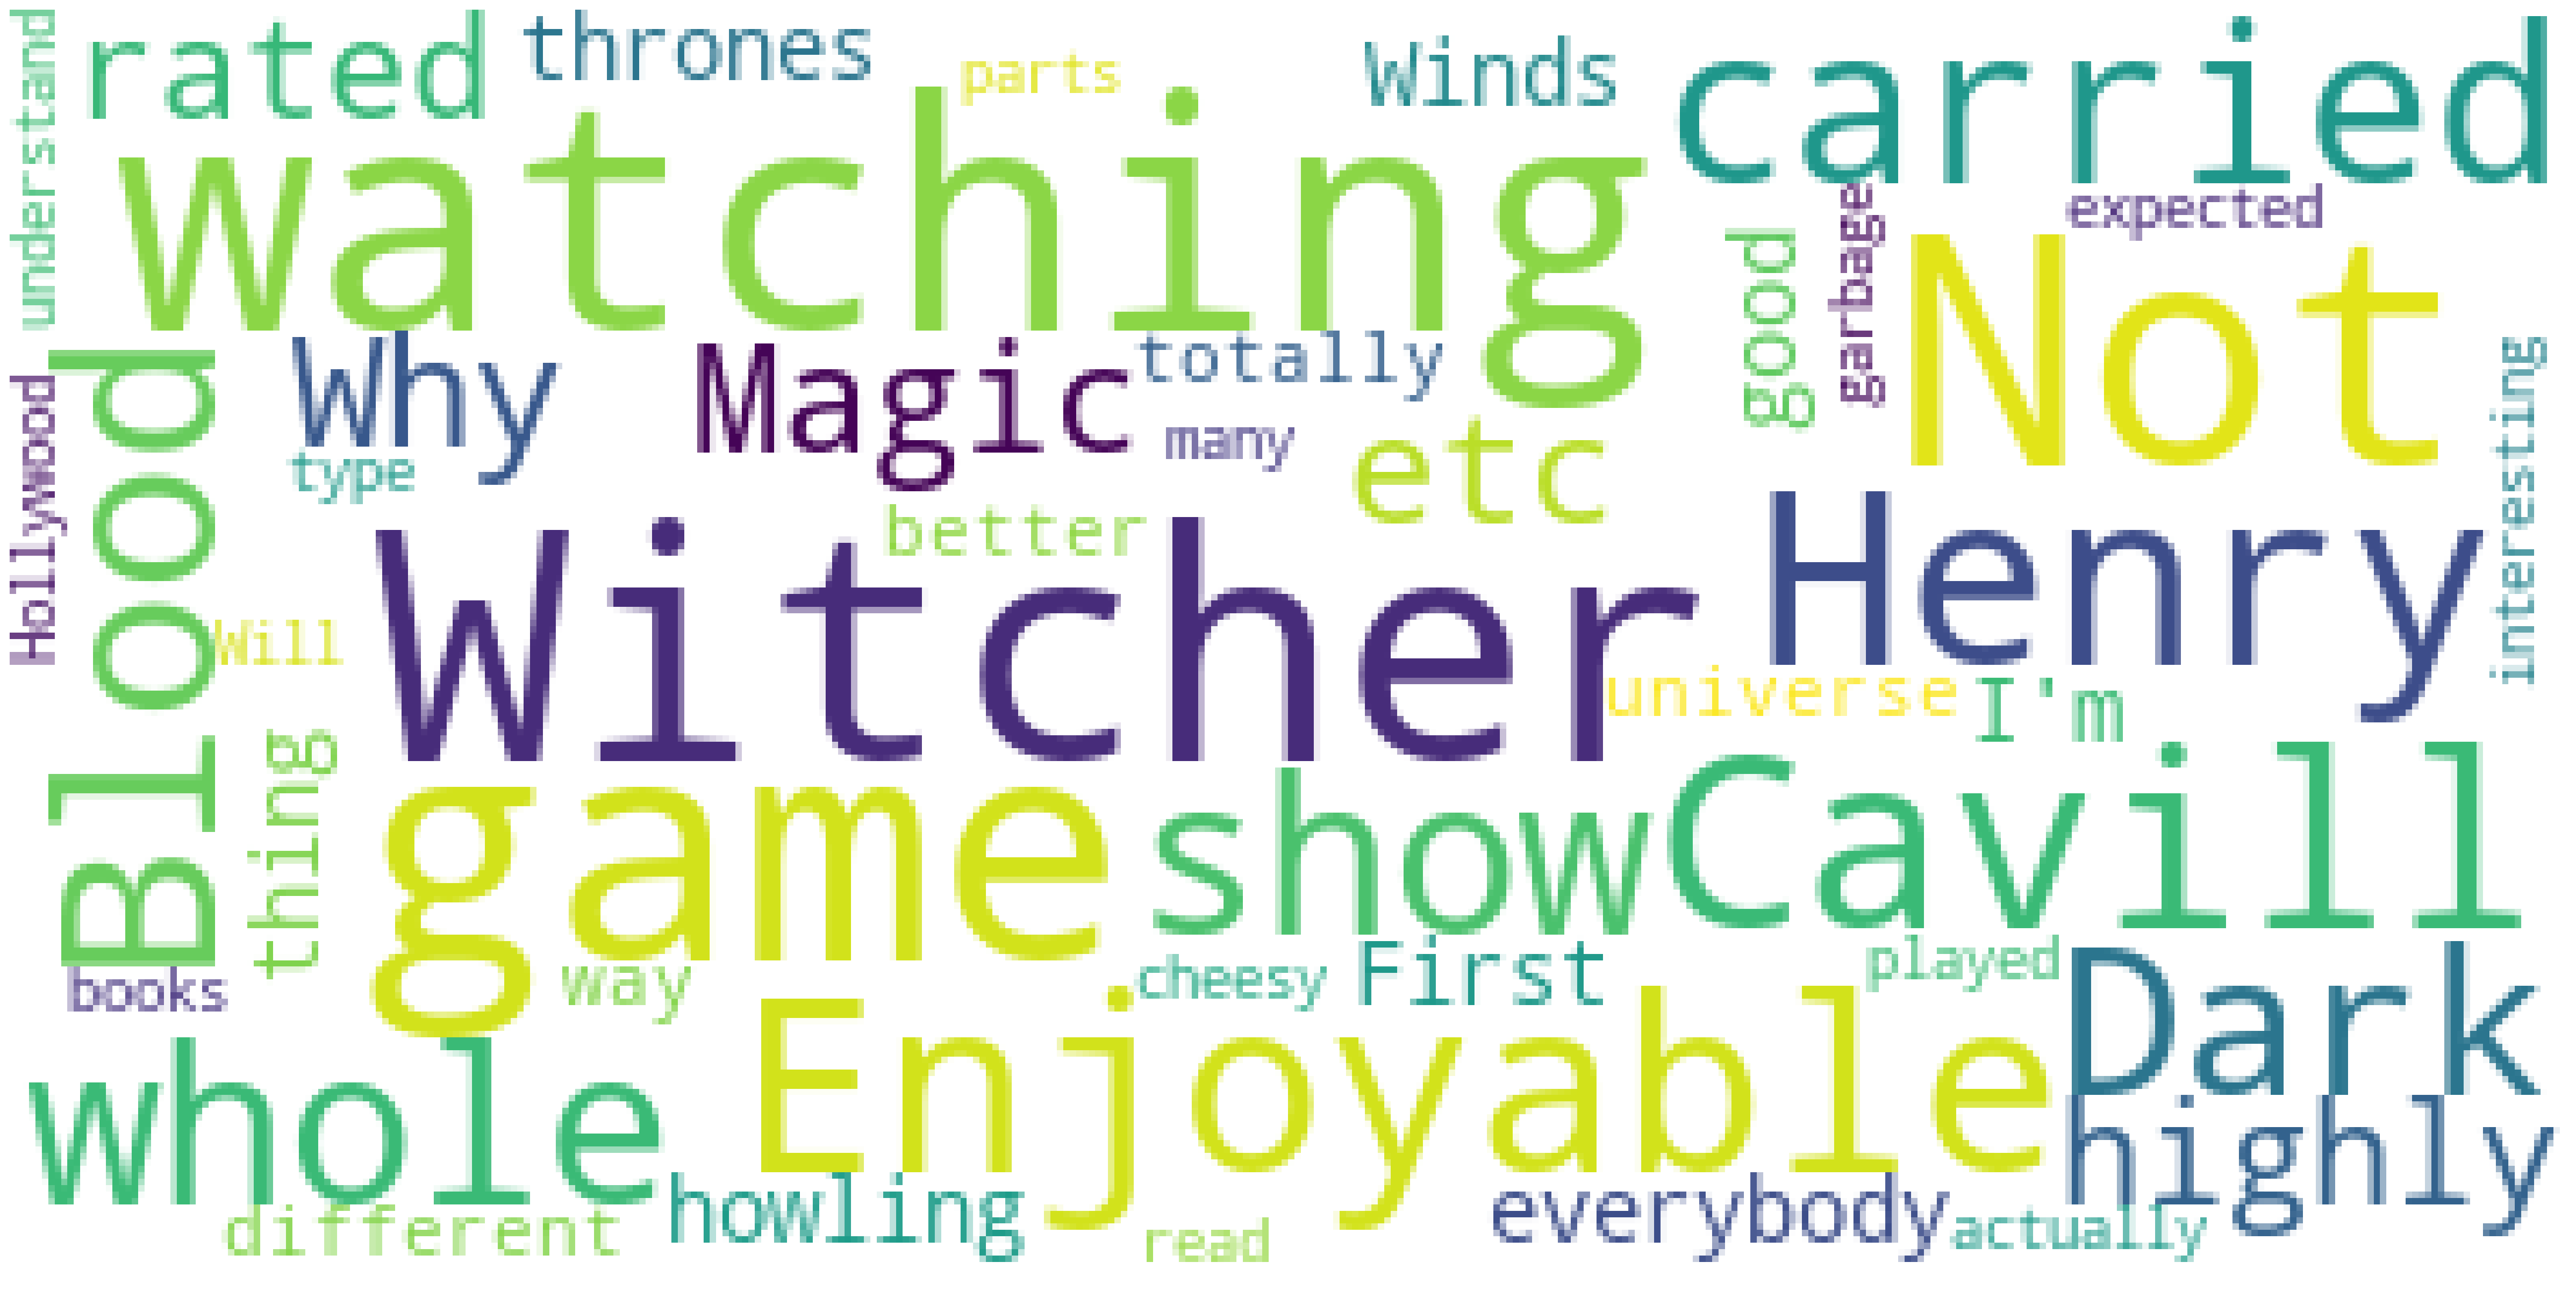

In [99]:
#Let us look at the most used words in all the positive reviews
wc(positive_reviews['Review'],'white','Most Used Words')

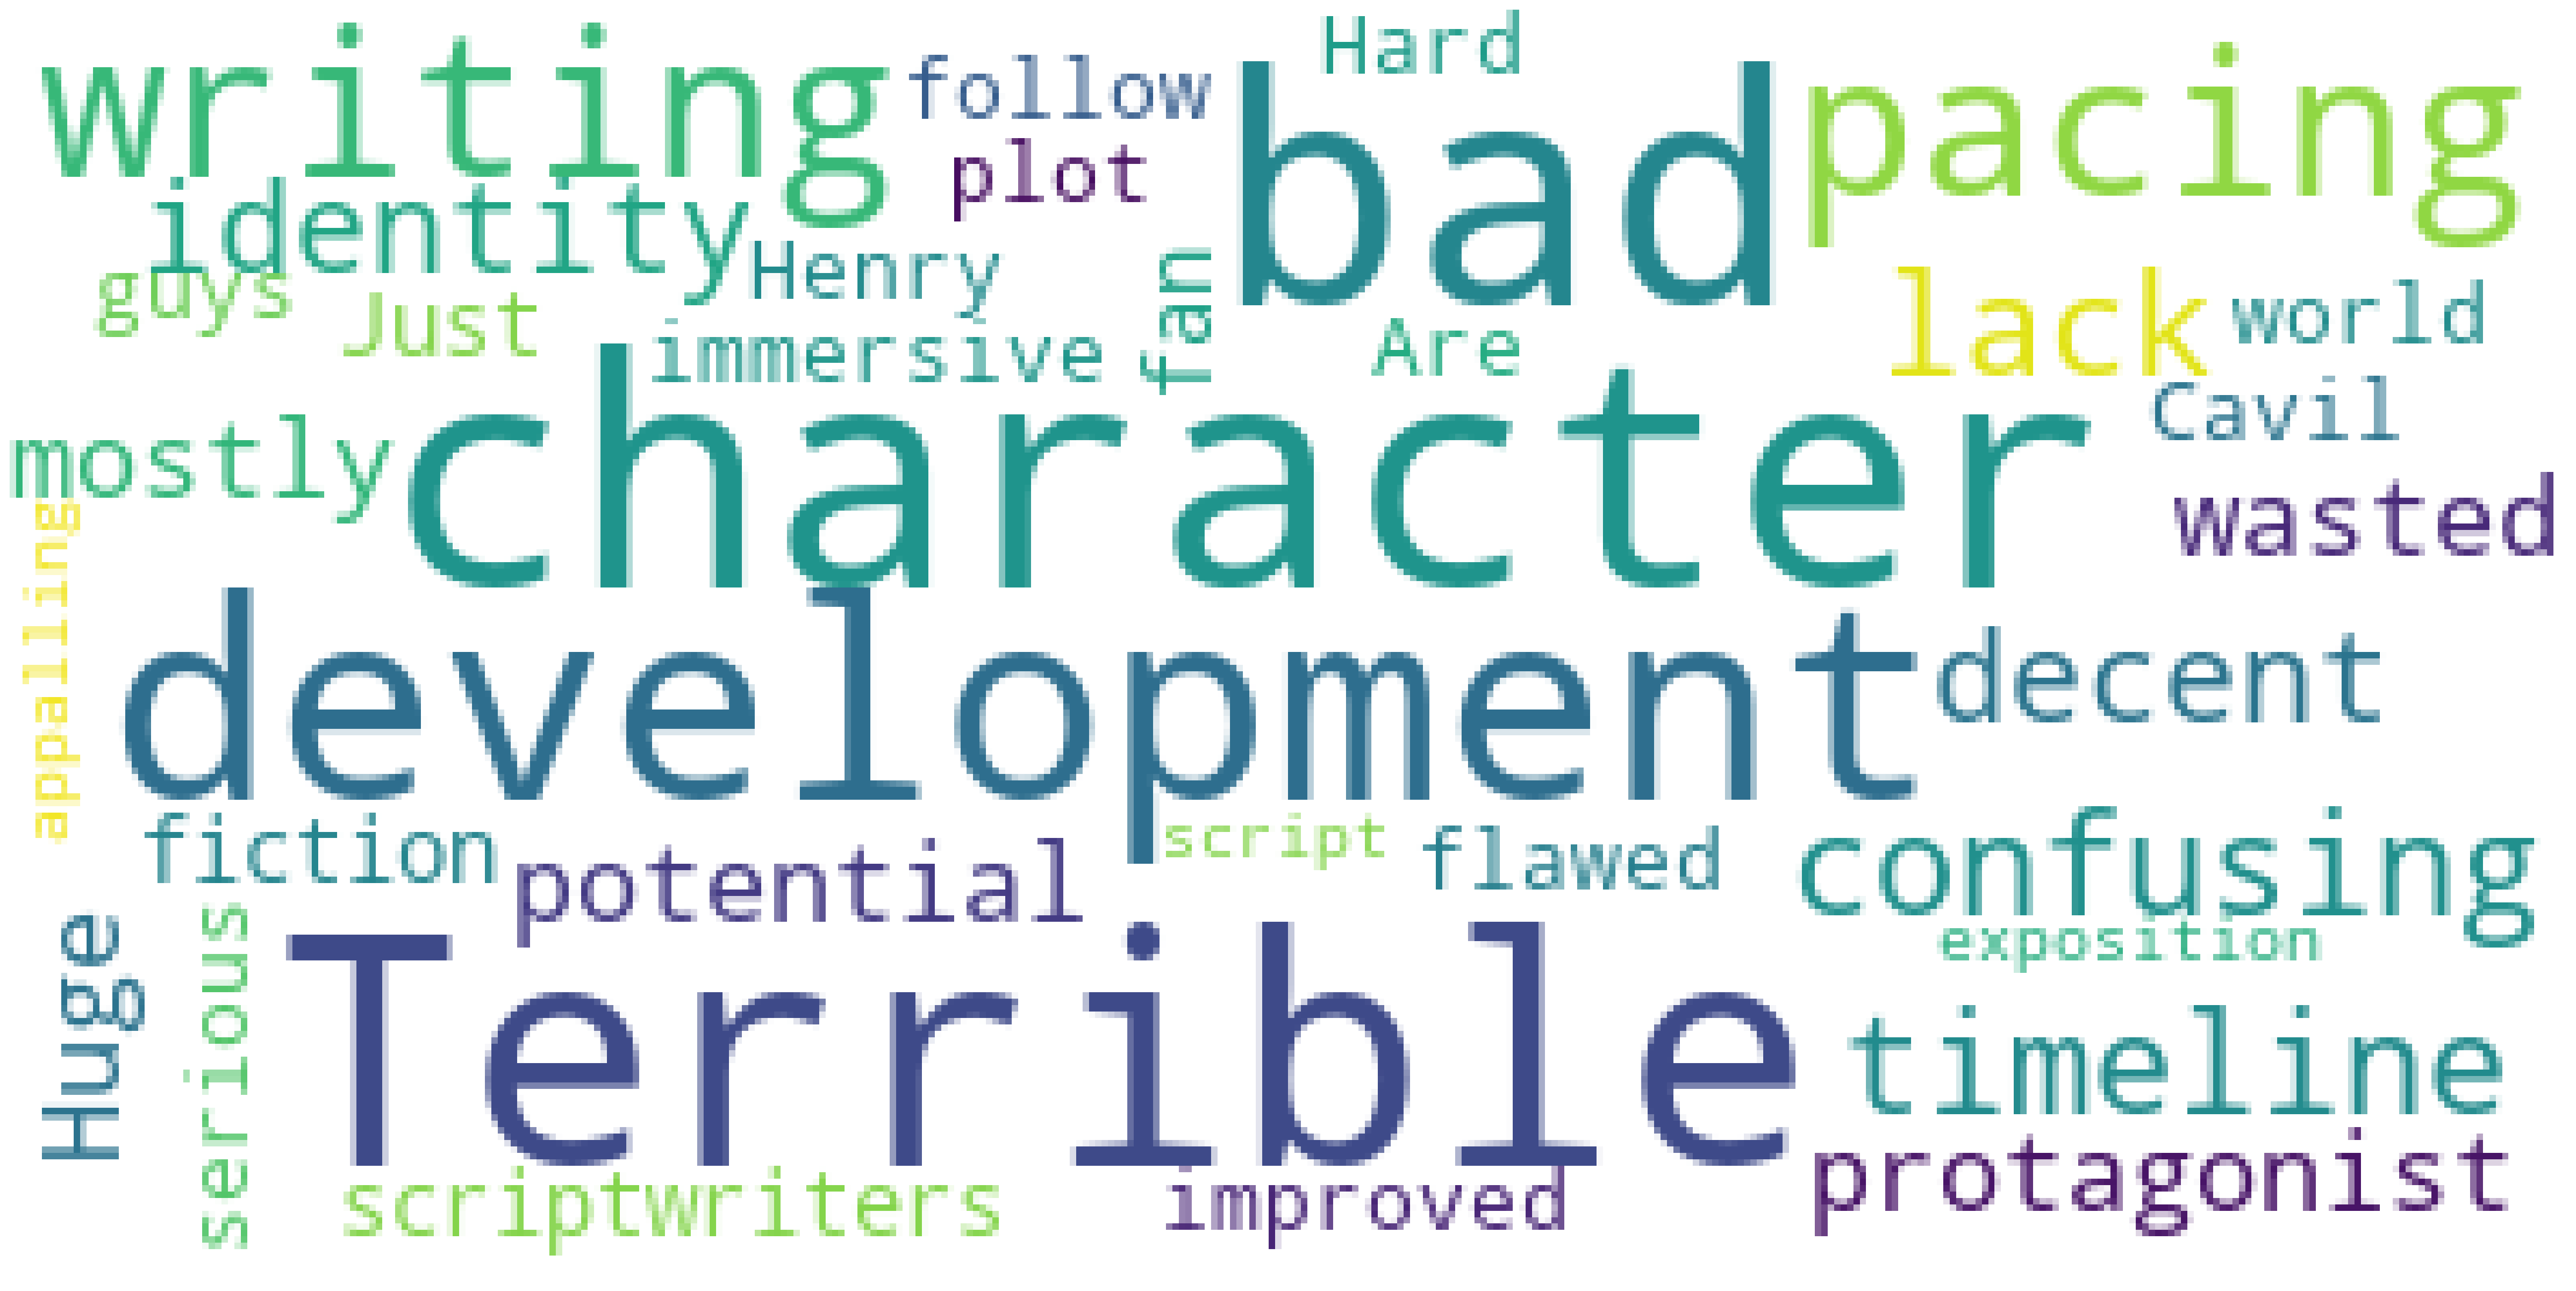

In [101]:
#Let us look at the most used words in all the negative reviews
wc(negative_reviews['Review'],'white','Most Used Words')

In [107]:
test_df

,Review,Rating,Review Length
0,Enjoyable but....,7,18
1,Henry Cavill carried the whole show,8,36
2,"Terrible writing, bad pacing, confusing timel...",5,124
3,"The Witcher: Blood, Dark, Magic, etc.",9,38
4,Why is this so highly rated?,5,29
5,Huge potential wasted (mostly) by terrible sc...,7,57
6,Just bad fan fiction only improved by Henry C...,4,50
7,Hard to follow,5,15
8,Is everybody watching the same thing I'm watc...,4,51
9,Not that good,5,14


# N-gram Analysis

In [109]:
#we will do a bigram (n=2) analysis over the tweets.Let's check the most common bigrams in tweets
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

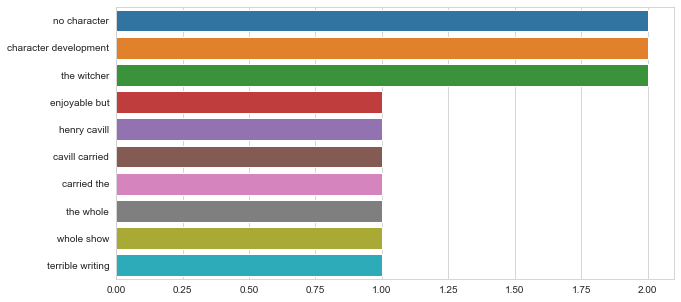

In [110]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(test_df['Review'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [114]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [118]:
#Let us now train a model We are taking only review with ratings 1 and 10 to perform the analysis to make the analysis more simple.

In [119]:
test_df=test_df.dropna(axis=0,how='any')
rating_class = test_df[(test_df['Rating'] == 1) | (test_df['Rating'] == 10)]
X_review=rating_class['Review']
y=rating_class['Rating']

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [121]:
X_review = bow_transformer.transform(X_review)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [125]:
#Let us train a model using Multinomial Naive Bayes as it works great on text.
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
predict=nb.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[1 0]
 [1 0]]

 Accuracy:
0.5
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Kia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
rating_positive=test_df['Review'][5]
rating_positive

' Huge potential wasted (mostly) by terrible scriptwriters'

In [128]:
rating_postive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_postive_transformed)[0]

1

In [130]:
rating_negative=test_df['Review'][1]
rating_negative

' Henry Cavill carried the whole show'

In [131]:
rating_negative_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

1

In [132]:
ratings_1 = (rating_class['Rating']==1).sum()
ratings_1_indices = np.array(rating_class[rating_class.Rating == 1].index)

In [133]:
ratings_10_indices = rating_class[rating_class.Rating == 10].index


random_normal_indices = np.random.choice(ratings_10_indices, ratings_1, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([ratings_1_indices,random_normal_indices])

In [134]:
undersample = rating_class.ix[under_sample_indices]

X_undersample = undersample.ix[:, undersample.columns != 'Rating']
y_undersample = undersample.ix[:, undersample.columns == 'Rating']

C:\Users\Kia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Kia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kia\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [135]:
print("Percentage of 10 ratings: ", len(undersample[undersample.Rating == 3])/len(undersample))
print("Percentage of 1 ratings: ", len(undersample[undersample.Rating == 1])/len(undersample))
print("Total number of examples in resampled data: ", len(undersample))

Percentage of 10 ratings:  0.0
Percentage of 1 ratings:  0.5
Total number of examples in resampled data:  6


In [136]:
X_review_us = X_undersample['Review']

In [137]:
X_review_us = bow_transformer.transform(X_review_us)


In [138]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_review_us, y_undersample, test_size=0.3, random_state=101)

In [139]:
nb.fit(X_train_us, y_train_us)
predict_us=nb.predict(X_test_us)

C:\Users\Kia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
print(confusion_matrix(y_test_us, predict_us))
print('\n Accuracy:')
print(accuracy_score(y_test_us, predict_us))
print(classification_report(y_test_us, predict_us))

[[0 1]
 [0 1]]

 Accuracy:
0.5
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Kia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
nb.fit(X_train_us, y_train_us)
predict_entire=nb.predict(X_test)

C:\Users\Kia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
print(confusion_matrix(y_test, predict_entire))
print('\n Accuracy:')
print(accuracy_score(y_test, predict_entire))
print(classification_report(y_test, predict_entire))

[[1 0]
 [0 1]]

 Accuracy:
1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [143]:
print(confusion_matrix(y_test, predict))
print('\n Accuracy:')
print(accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

[[1 0]
 [1 0]]

 Accuracy:
0.5
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Kia\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
